In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
file_path = r"C:\Users\goecg\Downloads\marketing_campaign.csv"
df = pd.read_csv(file_path, sep=';')
print("Data Loaded. Shape:", df.shape)
df.head()


Data Loaded. Shape: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
#  Step 3: Basic Cleaning
df.dropna(inplace=True)

# Convert Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

# Create new useful features
df['Age'] = 2025 - df['Year_Birth']
df['Customer_Since_Months'] = (pd.Timestamp("2025-01-01") - df['Dt_Customer']).dt.days // 30
df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df['Total_Accepted'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis=1)


AcceptedCmp1 - Accepted: 142 | Conversion Rate: 6.41%
AcceptedCmp2 - Accepted: 30 | Conversion Rate: 1.35%
AcceptedCmp3 - Accepted: 163 | Conversion Rate: 7.36%
AcceptedCmp4 - Accepted: 164 | Conversion Rate: 7.40%
AcceptedCmp5 - Accepted: 162 | Conversion Rate: 7.31%


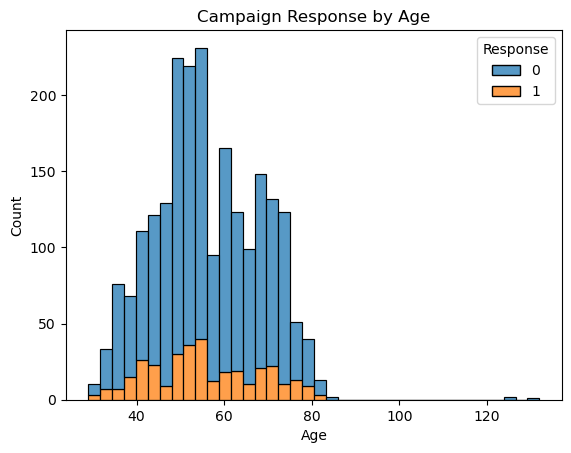

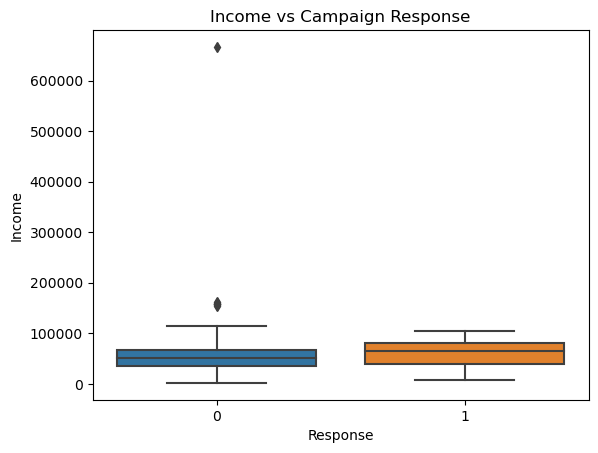

In [3]:
# Step 4: Exploratory Data Analysis (EDA)

campaigns = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
for c in campaigns:
    print(f"{c} - Accepted: {df[c].sum()} | Conversion Rate: {df[c].mean():.2%}")


sns.histplot(data=df, x='Age', hue='Response', multiple='stack')
plt.title("Campaign Response by Age")
plt.xlabel("Age")
plt.show()


sns.boxplot(data=df, x='Response', y='Income')
plt.title("Income vs Campaign Response")
plt.show()


In [4]:
# Step 5: Save Cleaned Data for Power BI
export_path = r"C:\Users\goecg\Downloads\marketing_campaign_cleaned.csv"
df.to_csv(export_path, index=False)
print("Cleaned data saved to:", export_path)


Cleaned data saved to: C:\Users\goecg\Downloads\marketing_campaign_cleaned.csv
